# KNN Principe de base

Les plus proches voisins (apprentissage supervisé – classification)

KNN (Nearest Neighbor) ou KPPV (plus proche voisin) l’algorithme des plus proches voisins évalue la probabilité selon laquelle une
donnée appartient à tel ou tel groupe. Il examine des données afin de déterminer le groupe auquel la donnée en question appartient.

L'algorithme des plus proches voisins est relativement simple.

Une de ses forces est de ne calculer aucune information dans le processus d'apprentissage.

Il recherche les N plus proches voisins (par un calcul de distance) entre la donnée à prédire et les données connues. Il retourne alors la classe de la majorité des voisins.

Assez simple à mettre en œuvre il peut générer beaucoup de calculs et ne pas être adapté à de fortes volumétries ; notamment si le nombre de paramètres est très grand.

Plus K augmente, plus le voisin est plus proche.


![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

          Exemple de classification k-NN

L'échantillon de test (cercle vert) pourrait être classé soit dans la première classe de carré bleu ou la seconde classe de triangles rouges. Si k = 3 (cercle en ligne pleine) il est affecté à la seconde classe car il y a deux triangles et seulement un carré dans le cercle considéré. Si k = 5 (cercle en ligne pointillée) il est affecté à la première classe (3 carrés face à deux triangles dans le cercle externe).

# Distance euclidien
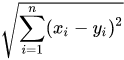

In [ ]:
import math
# Example points in 3-dimensional space...
x = (5, 6, 7)
y = (8, 9, 9)
distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
print("Euclidean distance from x to y: ",distance)

('Euclidean distance from x to y: ', 4.69041575982343)


In [ ]:
import numpy as np

def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print("Distance ",distance([3, 5], [1, 1]))

('Distance ', 4.47213595499958)


# Traitement pour IRIS Data 

In [ ]:
# Read data 
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])
# Create a learnset from the sets above First method 
np.random.seed(42)
indices = np.random.permutation(len(iris_data))
# print(indices)
n_training_samples = 12
learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

(array([5.1, 3.5, 1.4, 0.2]), array([5.7, 2.6, 3.5, 1. ]), array([6.3, 3.3, 6. , 2.5]))
(0, 1, 2)
(array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5]]), array([1, 0, 2, 1]))
(array([[5.7, 2.8, 4.1, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [6.4, 2.9, 4.3, 1.3]]), array([1, 2, 1, 1]))


In [ ]:
# load Iris dataset
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = pd.DataFrame(iris.data, columns=names)

# add target
data['target'] = iris.target

# split
training, validation = train_test_split(data, test_size=50, stratify=data['target'])

# standardization
training_targets = training.pop('target')
validation_targets = validation.pop('target')

data_mean = training.mean(axis=0)
data_std = training.std(axis=0)
training = (training - data_mean) / data_std
training['target'] = training_targets

validation = (validation - data_mean) / data_std
validation['target'] = validation_targets

print('Training data head')
display(training.head())

Training data head


,sepal_length,sepal_width,petal_length,petal_width,target
53,-0.402375,-1.725432,0.145959,0.119484,1
113,-0.157770,-1.271967,0.716111,1.028602,2
88,-0.280072,-0.138307,0.202974,0.119484,1
22,-1.503096,1.222086,-1.564498,-1.309130,0
60,-1.013887,-2.405628,-0.139117,-0.270138,1


In [ ]:
print("Distance entre deux points d'apprentissage: ",distance(learnset_data[3], learnset_data[44]))

("Distance entre deux points d'apprentissage: ", 3.4190641994557516)


Faire changer les features selectionnés



([], <a list of 0 Text yticklabel objects>)

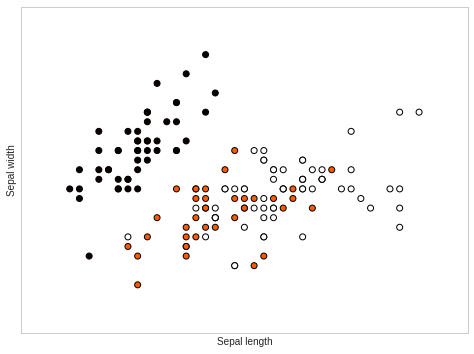

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.hot, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

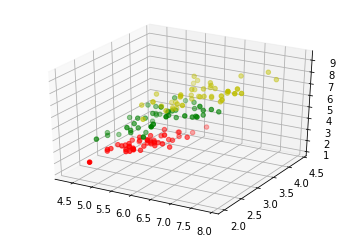

In [ ]:
# Visualize the data of our learnset
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

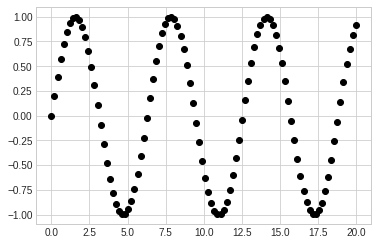

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
import numpy as np
x = np.linspace(0, 20, 100)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');



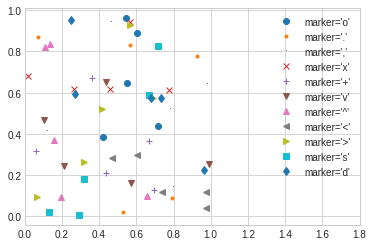

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

# K-Nearest Neighbors

Faire les changements necessaires pour utiliser les données ci-dessus denifies 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train = [[0], [1], [2], [3]]
y_train = [0, 0, 1, 1]
X_test =[[1.1]]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# load Iris dataset
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris_dataset = datasets.load_iris()

x_new =[[1.1]]
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))
print("predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
predicted target name: ['setosa']


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.058000
